# Classification of CT Images
                                               -BY Himanshu Bhardwaj(RA1811003010372)

# About The DATA

The dataset name is -CT Medical Images

The dataset is designed to allow for different methods to be tested for examining the trends in CT image data associated with using contrast and patient age. The basic idea is to identify image textures, statistical patterns and features correlating strongly with these traits and possibly build simple tools for automatically classifying these images when they have been misclassified.
The data are a tiny subset of images from the cancer imaging archive. They consist of the middle slice of all CT images taken where valid age, modality, and contrast tags could be found. This results in 475 series from 69 different patients.

In [1]:
import numpy as np # matrix tools
import matplotlib.pyplot as plt # for basic plots
import seaborn as sns 
import pandas as pd
from glob import glob
import re
from skimage.io import imread
import pydicom as dicom
import keras
%matplotlib inline
import os

# Exploratory Data Analysis

In [2]:

overview = pd.read_csv('overview.csv')
overview.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [3]:
len(overview)

100

In [4]:
overview['Contrast'] = overview['Contrast'].map(lambda x: 1 if x else 0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

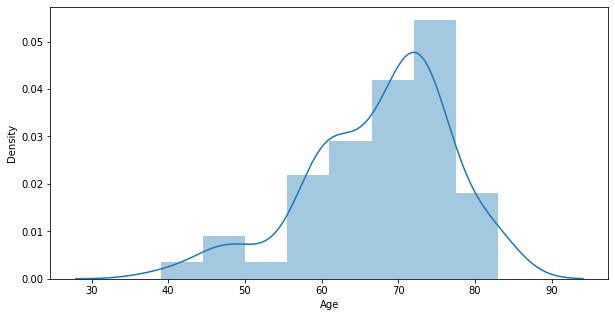

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(overview['Age'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


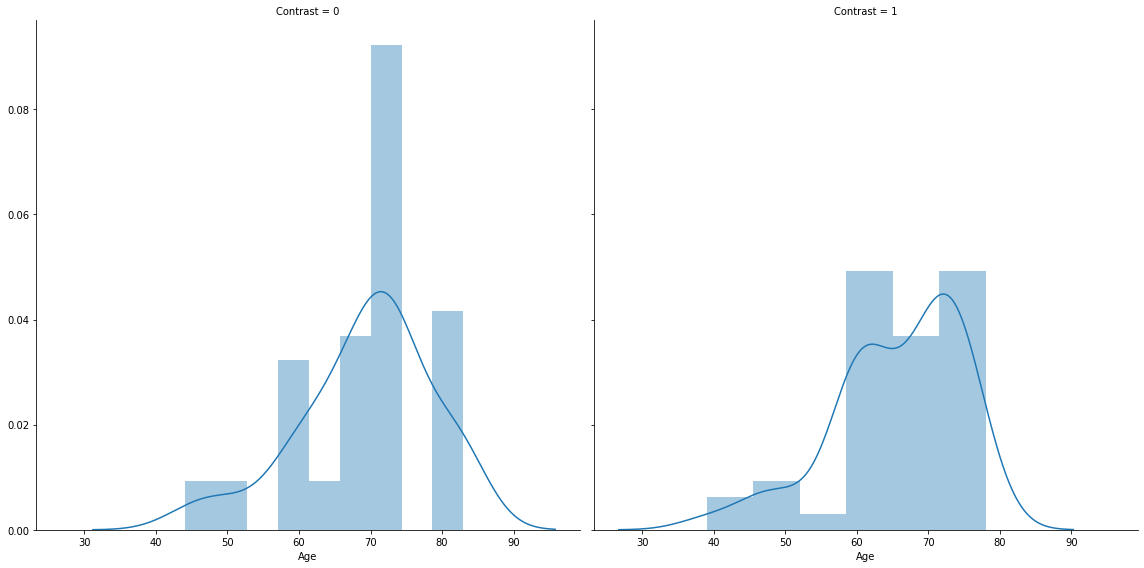

In [6]:
g = sns.FacetGrid(overview, col="Contrast", size=8)
g = g.map(sns.distplot, "Age")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


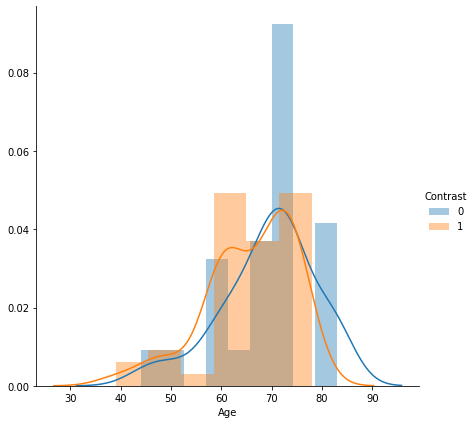

In [7]:
g = sns.FacetGrid(overview, hue="Contrast",size=6, legend_out=True)
g = g.map(sns.distplot, "Age").add_legend()

In [8]:
def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(path)])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data
ct_data = process_data('dicom_dir/*.dcm')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


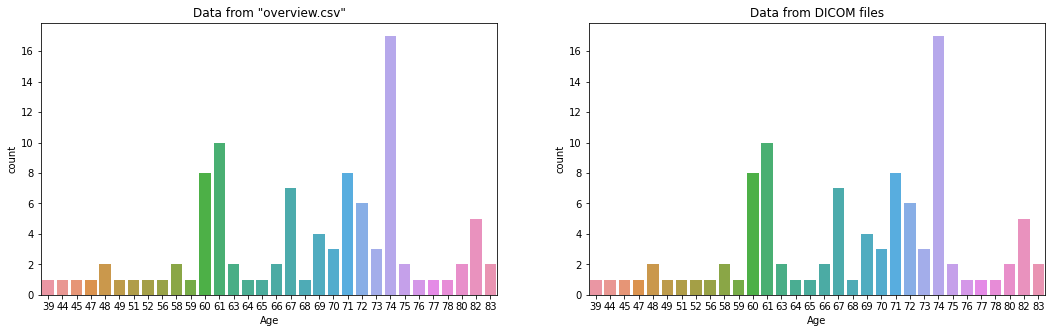

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
s1 = sns.countplot(overview['Age'], ax=ax1)
s1.set_title('Data from "overview.csv"')
s2 = sns.countplot(ct_data['Age'], ax=ax2)
s2.set_title('Data from DICOM files')
plt.show()

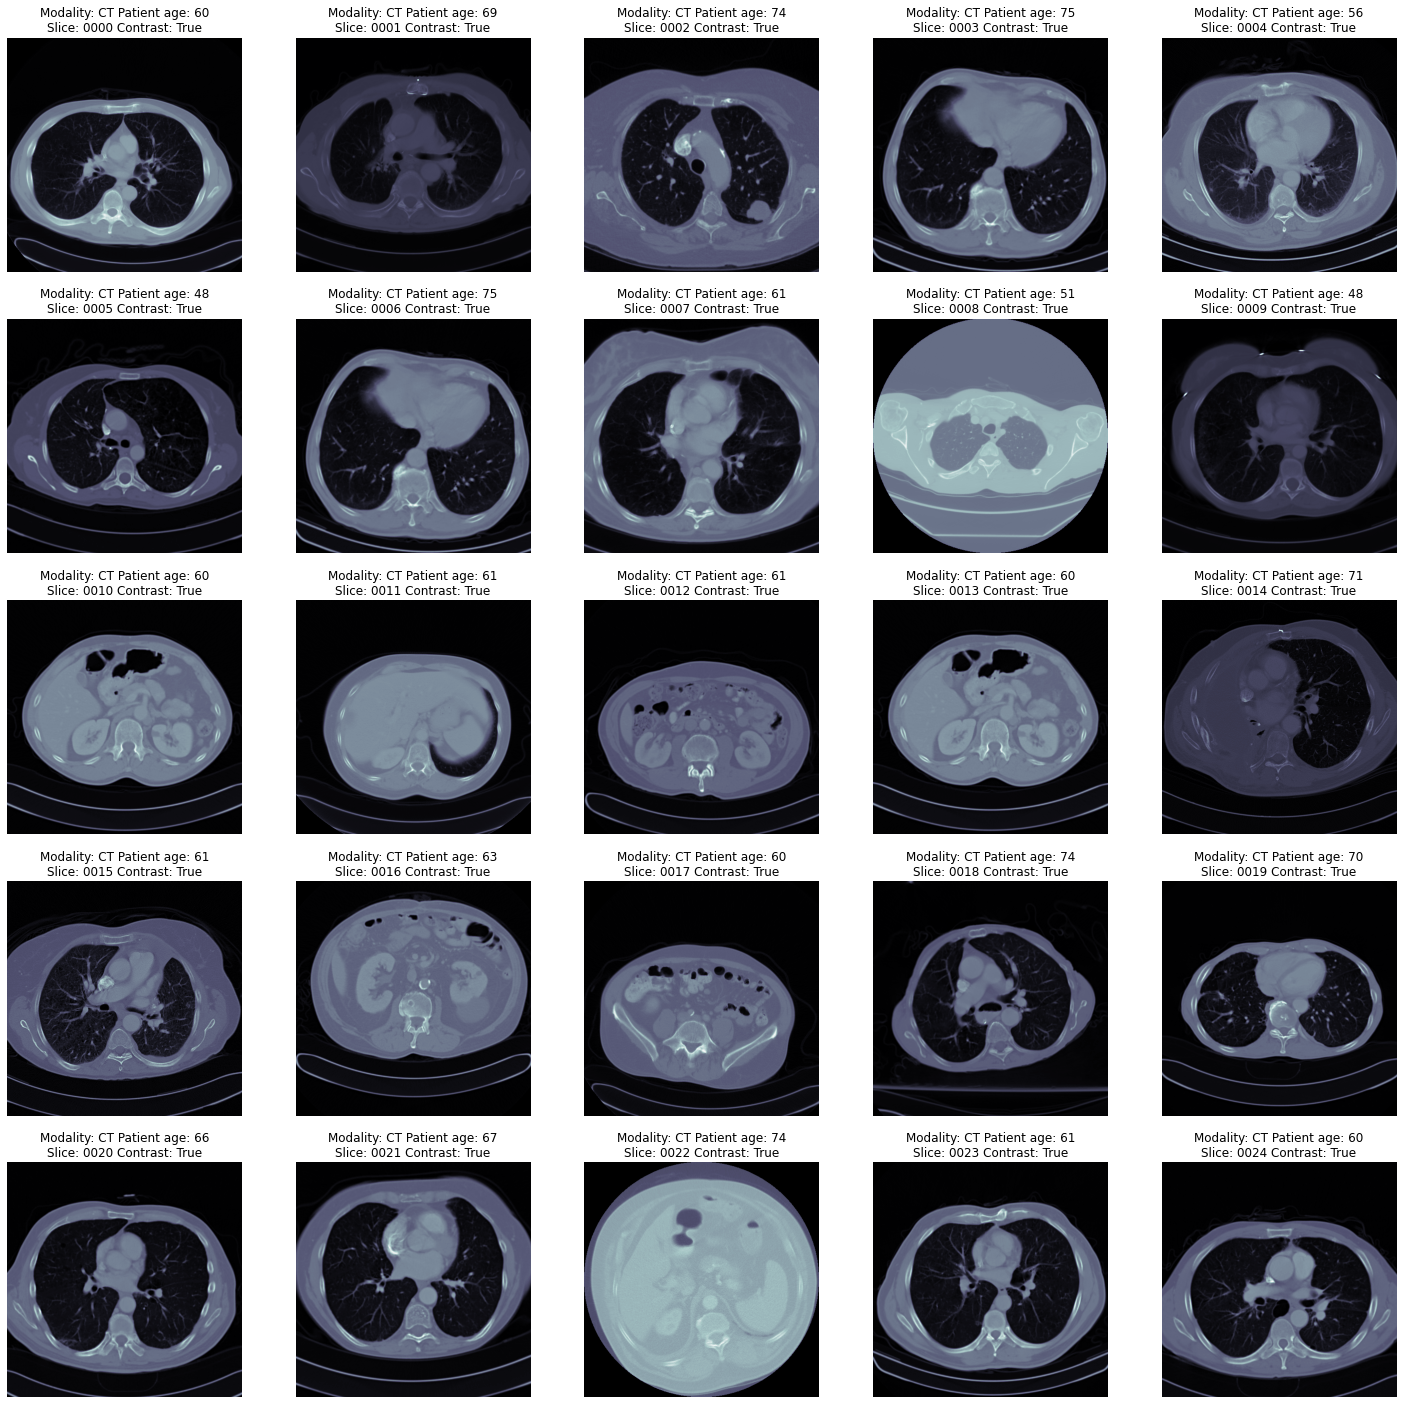

In [10]:
def show_imgs(data, dim=25, imtype='DICOM'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(5,5, figsize=(25,25))
    for i,data_row in enumerate(img_data):
        data_row_img = dicom.read_file(data_row['path'])
        ax[i//5, i%5].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title('Modality: {Modality} Patient age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()
show_imgs(ct_data)

# Reading Image Files

Using glob module we can read all image files by specifying the file names and image paths adn store them in a single list

In [11]:

all_images_list = glob(os.path.join('./','tiff_images','*.tif'))
all_images_list[:5]
print(all_images_list)

['./tiff_images\\ID_0000_AGE_0060_CONTRAST_1_CT.tif', './tiff_images\\ID_0001_AGE_0069_CONTRAST_1_CT.tif', './tiff_images\\ID_0002_AGE_0074_CONTRAST_1_CT.tif', './tiff_images\\ID_0003_AGE_0075_CONTRAST_1_CT.tif', './tiff_images\\ID_0004_AGE_0056_CONTRAST_1_CT.tif', './tiff_images\\ID_0005_AGE_0048_CONTRAST_1_CT.tif', './tiff_images\\ID_0006_AGE_0075_CONTRAST_1_CT.tif', './tiff_images\\ID_0007_AGE_0061_CONTRAST_1_CT.tif', './tiff_images\\ID_0008_AGE_0051_CONTRAST_1_CT.tif', './tiff_images\\ID_0009_AGE_0048_CONTRAST_1_CT.tif', './tiff_images\\ID_0010_AGE_0060_CONTRAST_1_CT.tif', './tiff_images\\ID_0011_AGE_0061_CONTRAST_1_CT.tif', './tiff_images\\ID_0012_AGE_0061_CONTRAST_1_CT.tif', './tiff_images\\ID_0013_AGE_0060_CONTRAST_1_CT.tif', './tiff_images\\ID_0014_AGE_0071_CONTRAST_1_CT.tif', './tiff_images\\ID_0015_AGE_0061_CONTRAST_1_CT.tif', './tiff_images\\ID_0016_AGE_0063_CONTRAST_1_CT.tif', './tiff_images\\ID_0017_AGE_0060_CONTRAST_1_CT.tif', './tiff_images\\ID_0018_AGE_0074_CONTRAST_1_C

In [12]:
imread(all_images_list[0]).shape

(512, 512)

In [13]:
np.array(np.arange(81)).reshape(9,9)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [14]:
np.array(np.arange(81)).reshape(9,9)[::3,::3]


array([[ 0,  3,  6],
       [27, 30, 33],
       [54, 57, 60]])

In [15]:
np.expand_dims(imread(all_images_list[0])[::4,::4],0).shape

(1, 128, 128)

In [16]:
jimread = lambda x: np.expand_dims(imread(x)[::2,::2],0)

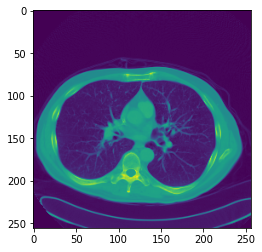

In [17]:
test_image = jimread(all_images_list[0])
plt.imshow(test_image[0])

In [18]:
check_contrast = re.compile(r'tiff_images\\ID_([\d]+)_AGE_[\d]+_CONTRAST_([\d]+)_CT.tif')
label = []
id_list = []
for image in all_images_list:
    id_list.append(check_contrast.findall(image)[0][0])
    label.append(check_contrast.findall(image)[0][1])

In [19]:
label_list = pd.DataFrame(label,id_list)

In [20]:
images = np.stack([jimread(i) for i in all_images_list],0)

In [21]:
len(images)

100

# Splitting to Train and Test Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(images, label_list, test_size=0.2, random_state=0)

# Reshaping Images for Fitting

In order to fit the data into the model it must be reshaped to 2d

In [24]:
n_train, depth, width, height = X_train.shape
n_test,_,_,_ = X_test.shape

In [25]:
n_train,depth, width, height

(80, 1, 256, 256)

In [26]:
input_shape = (width,height,depth)
input_shape

(256, 256, 1)

In [27]:
input_train = X_train.reshape((n_train, width,height,depth))
input_train.shape
input_train.astype('float32')
input_train = input_train / np.max(input_train)
input_train.max()

1.0

In [28]:
input_test = X_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / np.max(input_test)

In [29]:
output_train = keras.utils.to_categorical(y_train, 2)
output_test = keras.utils.to_categorical(y_test, 2)
output_train[5]

array([0., 1.], dtype=float32)

In [30]:
input_train.shape

(80, 256, 256, 1)

# Model Building

Building keras Sequential Model using 2d Covolutional Neural network 

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D

In [32]:
batch_size = 10
epochs = 20

In [33]:
model = Sequential()
model.add(Conv2D(50, (5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(4, 4)))  
model.add(Conv2D(30, (4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten()) 
model.add(Dense(2, activation='softmax'))


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 50)      1300      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 30)        24030     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 27000)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 54002     
Total params: 79,332
Trainable params: 79,332
Non-trainable params: 0
____________________________________________________

In [35]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

# Fitting data in the model

In [36]:
history = model.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Epoch 1/20
8/8 [==============================] - 3s 350ms/step - loss: 0.7189 - accuracy: 0.6375 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 3s 355ms/step - loss: 0.6796 - accuracy: 0.5875 - val_loss: 0.6668 - val_accuracy: 0.7500
Epoch 3/20
8/8 [==============================] - 3s 356ms/step - loss: 0.5852 - accuracy: 0.7875 - val_loss: 0.5591 - val_accuracy: 0.6500
Epoch 4/20
8/8 [==============================] - 2s 308ms/step - loss: 0.5032 - accuracy: 0.7375 - val_loss: 0.5385 - val_accuracy: 0.8000
Epoch 5/20
8/8 [==============================] - 2s 298ms/step - loss: 0.3098 - accuracy: 0.8750 - val_loss: 0.4616 - val_accuracy: 0.8000
Epoch 6/20
8/8 [==============================] - 3s 318ms/step - loss: 0.1988 - accuracy: 0.9500 - val_loss: 0.3536 - val_accuracy: 0.7500
Epoch 7/20
8/8 [==============================] - 3s 324ms/step - loss: 0.1345 - accuracy: 0.9750 - val_loss: 0.2571 - val_accuracy: 0.8000
Epoch 8/20
8/8 [====

# Model Evaluation

Measuring the Accuracy of the Model

In [37]:
val_loss,accuracy= model.evaluate(input_test, output_test, verbose=0)
accuracy

0.949999988079071

Model Accuracy is 89.99%

# Predicting Output

In [38]:
model.predict(input_test)

array([[3.32092753e-09, 1.00000000e+00],
       [9.95243728e-01, 4.75628348e-03],
       [4.08609845e-02, 9.59139049e-01],
       [8.87310088e-01, 1.12689994e-01],
       [9.03085172e-01, 9.69148427e-02],
       [9.99999881e-01, 1.16616988e-07],
       [1.66406491e-04, 9.99833584e-01],
       [9.95053887e-01, 4.94610798e-03],
       [9.99999881e-01, 1.12051538e-07],
       [9.88732219e-01, 1.12678166e-02],
       [8.26286674e-01, 1.73713341e-01],
       [9.99702513e-01, 2.97514780e-04],
       [9.99906063e-01, 9.39239617e-05],
       [1.12977577e-04, 9.99886990e-01],
       [1.90210085e-05, 9.99980927e-01],
       [1.09080065e-05, 9.99989033e-01],
       [8.17234576e-01, 1.82765439e-01],
       [1.80581324e-07, 9.99999762e-01],
       [2.33321100e-01, 7.66678929e-01],
       [4.82440472e-01, 5.17559528e-01]], dtype=float32)

# Summary

The CT Images were Fitted on Keras Sequential Model Consisting of 2D Convolutional Neural Network using Rectifying Linear Unit Function  and Output Dense Layer with Softmax activation Function.
The model was compiled with categorical crossentropy as the loss function, ADAM as the optimizer.
Upon model evaluation the model with the test data ,the model achieved an accuracy of 89.99%.
